# Aviation Accident Analysis

This project is meant to explore, analyse and visualize aviation accidents and related factors such as reasons, survival rates, fatalities, locations etc.

In [101]:
#Importing the Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

In [102]:
#Importing the Dataset

avi_data= pd.read_csv("Dataset1.csv")
avi_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [103]:
avi_data.shape

(5268, 13)

In [104]:
avi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 329.3+ KB


In [105]:
avi_data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [106]:
#missing data check

avi_data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [107]:
# Replacing time Nan values to time formate 

avi_data['Time']= avi_data['Time'].replace(np.nan, '00:00')

In [108]:
avi_data.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [109]:
avi_data['Time'].value_counts()

00:00    2223
15:00      32
12:00      31
11:00      29
19:30      26
         ... 
05:02       1
07:17       1
08:43       1
16:29       1
10:54       1
Name: Time, Length: 1005, dtype: int64

In [110]:
avi_data['Time']

0       17:18
1       06:30
2       00:00
3       18:30
4       10:30
        ...  
5263    06:30
5264    00:00
5265    00:15
5266    08:30
5267    00:00
Name: Time, Length: 5268, dtype: object

In [111]:
#replacing the unwanted symbols/ charecter

avi_data['Time'] = avi_data['Time'].str.replace('c: ','')
avi_data['Time'] = avi_data['Time'].str.replace('c:','')
avi_data['Time'] = avi_data['Time'].str.replace('c','')
avi_data['Time'] = avi_data['Time'].str.replace('12\'20','12:20')
avi_data['Time'] = avi_data['Time'].str.replace('18.40','18:40')
avi_data['Time'] = avi_data['Time'].str.replace('0943','09:43')
avi_data['Time'] = avi_data['Time'].str.replace('22\'08','22:08')
avi_data['Time'] = avi_data['Time'].str.replace('114:20','00:00')

In [112]:
#convert time column into datatype datetime64 

avi_data['Time'] = (avi_data['Date'] + ' ' +avi_data['Time']).astype(str)
avi_data['Time']=pd.to_datetime(avi_data['Time'], dayfirst=True)

In [113]:
avi_data['Time']

0      1908-09-17 17:18:00
1      1912-12-07 06:30:00
2      1913-06-08 00:00:00
3      1913-09-09 18:30:00
4      1913-10-17 10:30:00
               ...        
5263   2009-05-20 06:30:00
5264   2009-05-26 00:00:00
5265   2009-01-06 00:15:00
5266   2009-07-06 08:30:00
5267   2009-08-06 00:00:00
Name: Time, Length: 5268, dtype: datetime64[ns]

In [114]:
# data start date

avi_data.Time.min()

Timestamp('1908-09-17 17:18:00')

In [115]:
# data end data

avi_data.Time.max()

Timestamp('2009-12-03 09:48:00')

In [116]:
avi_data.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [117]:
#converting operator into upper case

avi_data['Operator']= avi_data.Operator.str.upper()

In [118]:
avi_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-12-07 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-06-08 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Exploratory Data Analysis

In [213]:
avi_data["Location"].value_counts()

Moscow, Russia              15
Sao Paulo, Brazil           15
Rio de Janeiro, Brazil      14
Manila, Philippines         13
Bogota, Colombia            13
                            ..
Annette Island, Alaska       1
Nassau, Bahamas              1
Near Tidjika, Mauritania     1
Talara, Peru                 1
Near Hankow, China           1
Name: Location, Length: 4303, dtype: int64

# Count of Accidents By Year

In [211]:
#accident count occurred by years

acc_by_yr = avi_data.groupby(avi_data.Time.dt.year)[['Date']].count()
acc_by_yr=acc_by_yr.rename(columns={"Date":"Count"})
acc_by_yr.head()

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


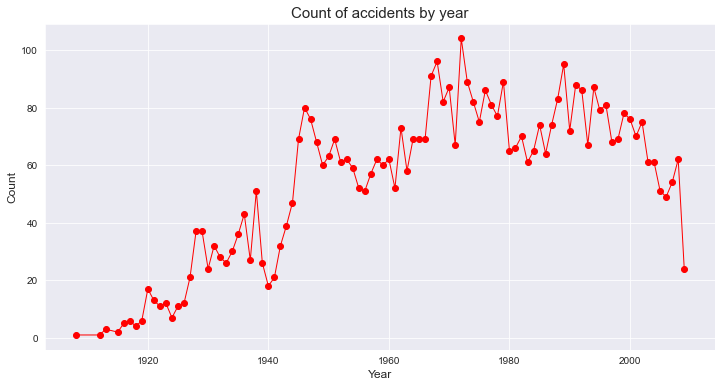

In [122]:
# line graph for accidents occured by years

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.plot(acc_by_yr.index, 'Count', data=acc_by_yr, color='Red', marker='o', linewidth=1)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by year', fontsize=15)
plt.show()

# Observation 1

1)From the year 1920 accident count increases till 1970

2)There is fall in number of accident after 2000

3)The accident count is high during the year 1960 to 1980

4)The number of accident increases significantly during the year 1950 

# Count of Accidents by Month

In [227]:
acc_by_month= avi_data.groupby(avi_data.Time.dt.month)[["Date"]].count()
acc_by_month=acc_by_month.rename(columns={"Date":"Count"})

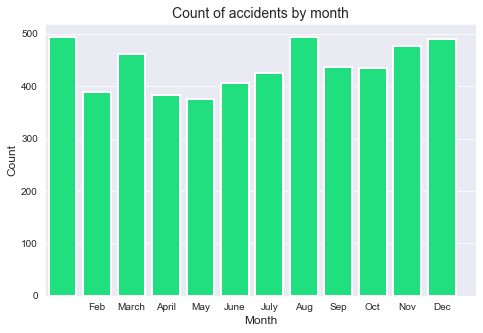

In [229]:
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2,2)
plt.figure(figsize=(17,11))
sns.set_style('darkgrid')
ax = plt.subplot(gs[0,1])
sns.barplot(acc_by_month.index, 'Count',data = acc_by_month, color='springgreen', linewidth=2)
plt.xticks(acc_by_month.index , ['Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by month', fontsize=14)
plt.show()

# Observation 2

1)The maximum count per month ranges from 400 to 500

2)During the month of Jan, March, Augest, November, and December the accident counts are high 

3)May and april month count is slightly lesser than other months

# Count of Accidents by Week

In [230]:
acc_by_week= avi_data.groupby(avi_data.Time.dt.weekday)[["Date"]].count()
acc_by_week=acc_by_week.rename(columns={"Date":"Count"})

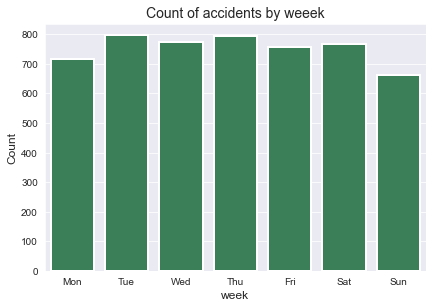

In [167]:
plt.figure(figsize=(15,10))
ax = plt.subplot(gs[1,0])
sns.barplot(acc_by_week.index, 'Count',data = acc_by_week, color='seagreen', linewidth=2)
plt.xticks(acc_by_week.index ,  ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by weeek', fontsize=14)
plt.show()

# Observation 3

The accident count is lesser in sundays than weekdays

# Count of Accidents by hour

In [127]:
acc_by_hour= avi_data[avi_data.Time.dt.hour != 0].groupby(avi_data.Time.dt.hour)[["Date"]].count()
acc_by_hour=acc_by_hour.rename(columns={"Date":"Count"})

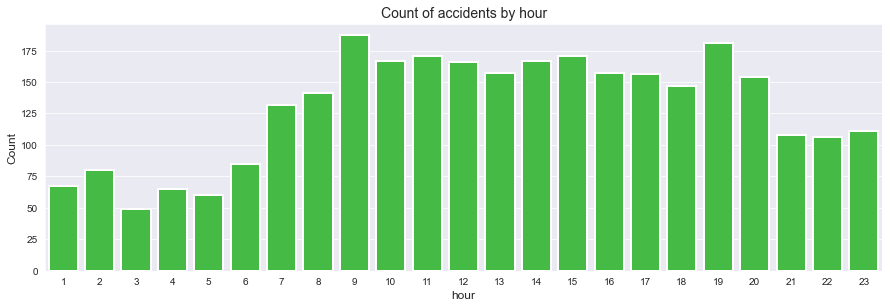

In [168]:
plt.figure(figsize=(15,10))
ax = plt.subplot(gs[1,:])
sns.barplot(acc_by_hour.index, 'Count',data = acc_by_hour, color='limegreen', linewidth=2)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by hour', fontsize=14)
plt.show()

# Observation 4

1)Most of the flight accidents occured during the day time from 9 A.M to 7 P.M
2)Untime accidents are lesser in number 

# Passenger vs military flights 

In [140]:
#Flight type count

flight_typ= avi_data.copy()
flight_typ['isMilitary'] = flight_typ.Operator.str.contains('MILITARY')
flight_typ = flight_typ.groupby('isMilitary')[['isMilitary']].count()
flight_typ.index = ['Passenger', 'Military']
flight_typ

,isMilitary
Passenger,4469
Military,781


Text(0.5, 1.0, 'Total number of accidents by flight type')

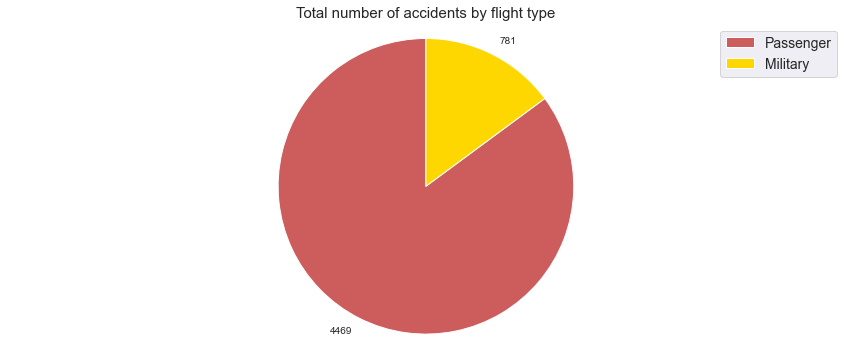

In [165]:
#Total number of accidents by flight type

colors = ['indianred', 'gold']
plt.figure(figsize=(15,6))
plt.pie(flight_typ.isMilitary, colors=colors, labels=flight_typ.isMilitary, startangle=90)
plt.legend( flight_typ.index, fontsize=14)
plt.axis('equal')
plt.title('Total number of accidents by flight type', fontsize=15)

# Observation 5
Passenger flight are crashed many times where as the military flights accidents are less than 90% from the year 1908 to 2009

In [190]:
#count of accidents by flight type

flight_typ_acc = avi_data[["Time","Operator"]]
flight_typ_acc['Military'] = flight_typ_acc.Operator.str.contains('MILITARY')
flight_typ_acc['Passenger'] = flight_typ_acc.Military == False
flight_typ_acc = flight_typ_acc.groupby(flight_typ_acc.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)
flight_typ_acc

<ipython-input-190-438637477a07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_typ_acc['Military'] = flight_typ_acc.Operator.str.contains('MILITARY')
<ipython-input-190-438637477a07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_typ_acc['Passenger'] = flight_typ_acc.Military == False


,Military,Passenger
Time,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0
...,...,...
2005,7,44
2006,12,37
2007,6,48


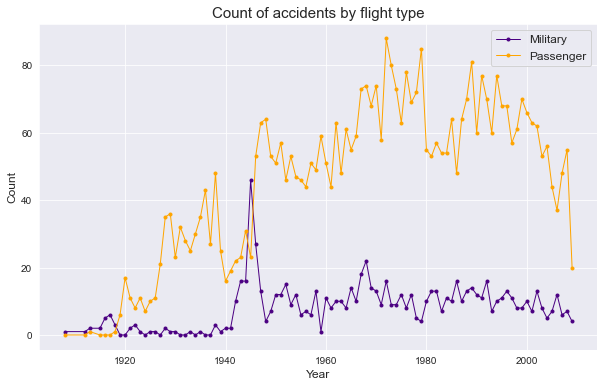

In [195]:
plt.figure(figsize=(10,6))
plt.plot(flight_typ_acc.index, 'Military', data=flight_typ_acc, color='indigo', marker='.', linewidth=1)
plt.plot(flight_typ_acc.index, 'Passenger', data=flight_typ_acc, color='orange', marker='.', linewidth=1)
plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by flight type', fontsize=15)
plt.show()

# Observation 6

1)Military flights accidents are not frequently occured more, but only at 1940 the number of accidents was quiet more than the normal case

2)Flight accidents in passenger flights are more in number till 1980, later years it gradualy decreased and in the year 2009 accident number recored was in the range 20

# Total Number of fatalities

In [199]:
Fatalities = avi_data.groupby(avi_data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']
Fatalities

,Aboard,Fatalities,Ground,Proportion
Time,,,,
1908,2.0,1.0,0.0,0.500000
1912,5.0,5.0,0.0,1.000000
1913,51.0,45.0,0.0,0.882353
1915,60.0,40.0,0.0,0.666667
1916,109.0,108.0,0.0,0.990826
...,...,...,...,...
2005,2164.0,1306.0,59.0,0.603512
2006,1413.0,1136.0,4.0,0.803963
2007,1364.0,931.0,57.0,0.682551


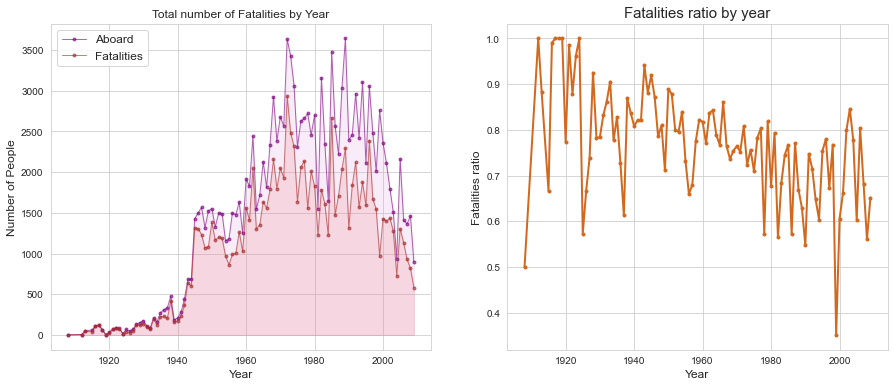

In [210]:
#total number of fatalities by year
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color='plum', alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker='.', color='purple', alpha=0.6, linewidth=1)

plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color='lightcoral', alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, marker='.', color='brown', alpha=0.6, linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Total number of Fatalities by Year')

#fatalities ratio by years

plt.subplot(1,2,2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker='.', color='chocolate', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fatalities ratio', fontsize=12)
plt.title('Fatalities ratio by year', fontsize=15)
plt.show()